## Electioneering Simulation
### Inspired by "Primer's" YouTube Video - "Simulating alternate voting systems"
#### Go watch the video at https://www.youtube.com/watch?v=yhO6jfHPFQU

In [1]:
#Importing Modules (Numpy for arrays, matplotlib for visualization, random for randomizing)
import math
import numpy as np
import matplotlib.pyplot as plt
import random

#Supress Scientific notation in print options
np.set_printoptions(suppress=True)

In [2]:
#Candidate object for candidates in election
class Candidate():
    def __init__(self, x_policies = random.uniform(-1, 1), y_policies = random.uniform(-1, 1)):
        self.x_policies = x_policies
        self.y_policies = y_policies

#Voter object for voter in election
class Voter():
    def __init__(self, x_beliefs = random.uniform(-1, 1), y_beliefs = random.uniform(-1, 1)):
        self.x_beliefs = x_beliefs
        self.y_beliefs = y_beliefs
        
#Election simulation itself
class Election():
    def __init__(self, voter_count, candidate_count, voter_extremism, candidate_extremism):
        self.voter_extremism = voter_extremism
        self.candidate_extremism = candidate_extremism
        self.voter_count = voter_count
        self.candidate_count = candidate_count
        self.candidate_list = [Candidate(random.uniform(candidate_extremism[0], candidate_extremism[1]), random.uniform(candidate_extremism[0], candidate_extremism[1])) for x in range(candidate_count)]
        self.voter_list = [Voter(random.uniform(voter_extremism[0], voter_extremism[1]), random.uniform(voter_extremism[0], voter_extremism[1])) for x in range(voter_count)]
    
    def calculate_distances(self):
        self.candidate_distances = np.array([999 for x in range(len(self.candidate_list))])
        for voter in self.voter_list:
            a = []
            for candidate in self.candidate_list:
                a.append(math.sqrt((voter.x_beliefs - candidate.x_policies) ** 2 + (voter.y_beliefs - candidate.y_policies) ** 2))
            self.candidate_distances = np.vstack([self.candidate_distances, a])
        self.candidate_distances = np.delete(self.candidate_distances, 0, 0)
    
    def approval_vote(self, rang = 10):
        self.range = rang
        self.calculate_distances()
        self.candidate_distances = np.where(self.candidate_distances > rang, 999, self.candidate_distances)
        self.candidates_recieved = []
        for row in enumerate(self.candidate_distances):
            self.candidates_recieved += [list(self.candidate_distances[row[0]]).index(value) for value in row[1] if value != 999]
        self.winner = max(set(self.candidates_recieved), key=self.candidates_recieved.count)
        print(f'Winner: Candidate {self.winner} at position ({self.candidate_list[self.winner].x_policies},{self.candidate_list[self.winner].y_policies}) with {self.candidates_recieved.count(self.winner)} votes')
        
    def approval_plot(self):
        self.number_candidates = len(self.candidate_list)
        self.candidates_recieved = [1 for x in self.voter_list]
        self.plot_setup()
        titlestring = 'Results of a approval election with ' + str(self.number_candidates) + ' candidates and ' + str(len(self.voter_list)) + ' voters'
        plt.title(titlestring, fontsize=22)
        plt.xlabel('Beliefs axis 1',fontsize=20)
        plt.ylabel('Beliefs axis 2',fontsize=20)
        for candidate in self.candidate_list:
            plt.scatter(candidate.x_policies , candidate.y_policies , s=self.range * 4.8 * (abs(min(self.voter_extremism[0], self.candidate_extremism[0])) + max(self.candidate_extremism[1], self.voter_extremism[1])) ,  facecolors='none', edgecolors='black' ) 
        plt.show()
    
    def plurality_vote(self, strategy = 1, recursion = 0):
        self.calculate_distances()
        self.votesgranted = self.candidate_distances.min(axis=1)
        
        self.candidates_recieved = []
        for value in enumerate(self.votesgranted):
            self.candidates_recieved.append(np.where(self.candidate_distances[value[0]] == self.votesgranted[value[0]]))
        self.candidates_recieved = [int(value[0]) for value in self.candidates_recieved]
        if not recursion:
            self.number_candidates = len(self.candidate_list)
        if strategy:
            self.plurality_plot()
            self.number_candidates = len(self.candidate_list)
            self.top_votes = max(set(self.candidates_recieved), key = self.candidates_recieved.count)
            print(f'The candidate with the most votes initially is a Candidate {self.top_votes} at position ({self.candidate_list[self.top_votes].x_policies}, {self.candidate_list[self.top_votes].y_policies})')
            self.temp_candidates_recieved = self.candidates_recieved
            self.candidates_recieved = [vote for vote in self.candidates_recieved if vote != self.top_votes] 
            self.second_top_votes = max(set(self.candidates_recieved), key = self.candidates_recieved.count)
            self.candidates_recieved = self.temp_candidates_recieved
            self.candidate_list = [self.candidate_list[self.top_votes], self.candidate_list[self.second_top_votes]]
            self.plurality_vote(0, 1)
        
        self.winner = max(set(self.candidates_recieved), key=self.candidates_recieved.count)
        
        if not recursion:
            print(f'Winner: Candidate {self.winner} at position ({self.candidate_list[self.winner].x_policies},{self.candidate_list[self.winner].y_policies})')
            if strategy:
                print(f'Runner up: Candidate {self.second_top_votes} at position ({self.candidate_list[1].x_policies},{self.candidate_list[1].y_policies})')
      
    def plot_setup(self):
        self.voter_x = [voter[1].x_beliefs for voter in enumerate(self.voter_list)]
        self.voter_y = [voter[1].y_beliefs for voter in enumerate(self.voter_list)]
        self.candidate_x = [candidate[1].x_policies for candidate in enumerate(self.candidate_list)]
        self.candidate_y = [candidate[1].y_policies for candidate in enumerate(self.candidate_list)]
        plt.scatter(self.candidate_x, self.candidate_y, c = [x for x in range(len(self.candidate_list))], cmap = 'Dark2', s=200)
        plt.scatter(self.voter_x, self.voter_y, c = self.candidates_recieved, cmap = 'Dark2')
    
    def plurality_plot(self):
        self.plot_setup()
        titlestring = 'Results of a plurality election with ' + str(self.number_candidates) + ' candidates and ' + str(len(self.voter_list)) + ' voters'
        plt.title(titlestring, fontsize=22)
        plt.xlabel('Beliefs axis 1',fontsize=20)
        plt.ylabel('Beliefs axis 2',fontsize=20)
        plt.show()
        
        
        

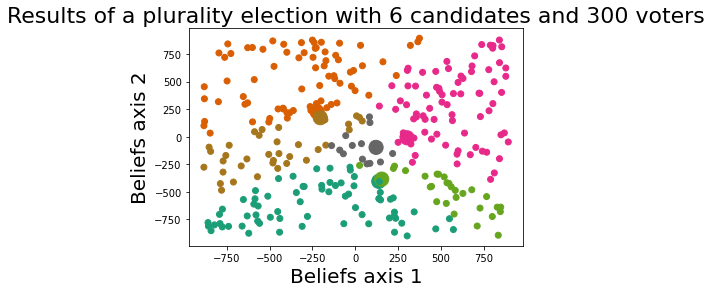

The candidate with the most votes initially is a Candidate 2 at position (303.83593400263476, -9.80064185426346)
Winner: Candidate 0 at position (303.83593400263476,-9.80064185426346)
Runner up: Candidate 1 at position (-222.34861952130382,225.62790023262392)


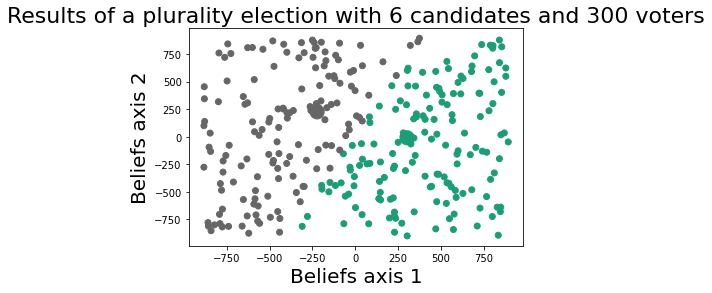

In [8]:
a = Election(300, 6, (-900, 900), (-500, 500))
#a.approval_vote(10)
#a.approval_plot()
a.plurality_vote()
a.plurality_plot()